In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
import muon as mu

In [2]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.1 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.13


In [3]:
mdata = mu.read("/Users/jerryaaaaaa/scTCR_filtered.h5mu")

/opt/miniconda3/lib/python3.12/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)


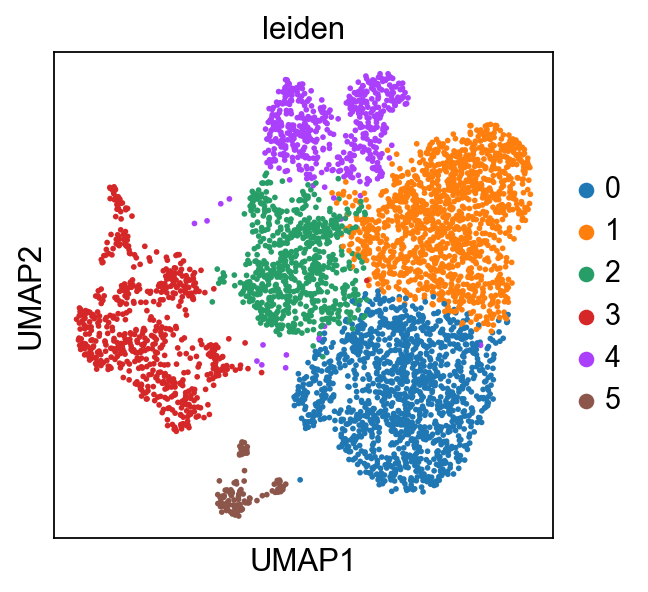

In [4]:
sc.pl.umap(mdata["gex"], color="leiden")

Cluster 0: T_proliferate

CLuster 1: T_effector/exh_1

Cluster 2: T_stem-like_exh

Cluster 3: T_bystander

Cluster 4: T_effector_exh_2

Cluster 5: TRM

Incoporating clonal_dynamic + expansion_fold

In [5]:
tcr_clonal_info = pd.read_csv("/Users/jerryaaaaaa/clonal_dynamic.csv")

In [6]:
label_map = {"Enriched": 1, "Eclipsed": 0}
tcr_clonal_info["clonal_dynamic_label"] = tcr_clonal_info["clonal_dynamic"].map(label_map)

In [7]:
tcr_clonal_info

,clone_id,clonal_dynamic,expansion_fold,clonal_dynamic_label
0,0,Enriched,18.141,1.0
1,1,Enriched,4.414,1.0
2,2,Enriched,5.570,1.0
3,3,Enriched,164.062,1.0
4,4,Enriched,193.690,1.0
5,5,Enriched,1299.588,1.0
6,6,Enriched,970.924,1.0
7,8,Enriched,34.481,1.0
8,9,Enriched,1212.647,1.0
9,12,Enriched,527.694,1.0


In [8]:
tcr_clonal_info["clone_id"] = tcr_clonal_info["clone_id"].astype(str)

In [9]:
tcr_clonal_info = tcr_clonal_info.set_index("clone_id")

In [12]:
mdata["airr"].obs["clonal_dynamic_label"] = mdata["airr"].obs["clone_id"].map(tcr_clonal_info["clonal_dynamic_label"])
mdata["airr"].obs["clonal_dynamic"] = mdata["airr"].obs["clone_id"].map(tcr_clonal_info["clonal_dynamic"])
mdata["airr"].obs["expansion_fold"] = mdata["airr"].obs["clone_id"].map(tcr_clonal_info["expansion_fold"])

In [13]:
mdata["airr"].obs

,receptor_type,receptor_subtype,chain_pairing,clone_id,clone_id_size,clonal_dynamic_label,clonal_dynamic,expansion_fold
cell_id,,,,,,,,
AAACCTGAGAATGTTG-1,TCR,TRA+TRB,single pair,0,2879,1.0,Enriched,18.141
AAACCTGAGGTAGCTG-1,TCR,TRA+TRB,single pair,0,2879,1.0,Enriched,18.141
AAACCTGAGTAGATGT-1,TCR,TRA+TRB,single pair,1,219,1.0,Enriched,4.414
AAACCTGAGTGGAGTC-1,TCR,TRA+TRB,single pair,0,2879,1.0,Enriched,18.141
AAACCTGCAGACAAGC-1,TCR,TRA+TRB,single pair,0,2879,1.0,Enriched,18.141
...,...,...,...,...,...,...,...,...
TTTGTCACATCGACGC-1,TCR,TRA+TRB,single pair,0,2879,1.0,Enriched,18.141
TTTGTCAGTTGGAGGT-1,TCR,TRA+TRB,single pair,0,2879,1.0,Enriched,18.141
TTTGTCATCACAACGT-1,TCR,TRA+TRB,single pair,111,12,1.0,Enriched,104.145


In [14]:
mdata.update()

In [17]:
mdata["gex"].obs["clone_id"] = mdata["airr"].obs["clone_id"]

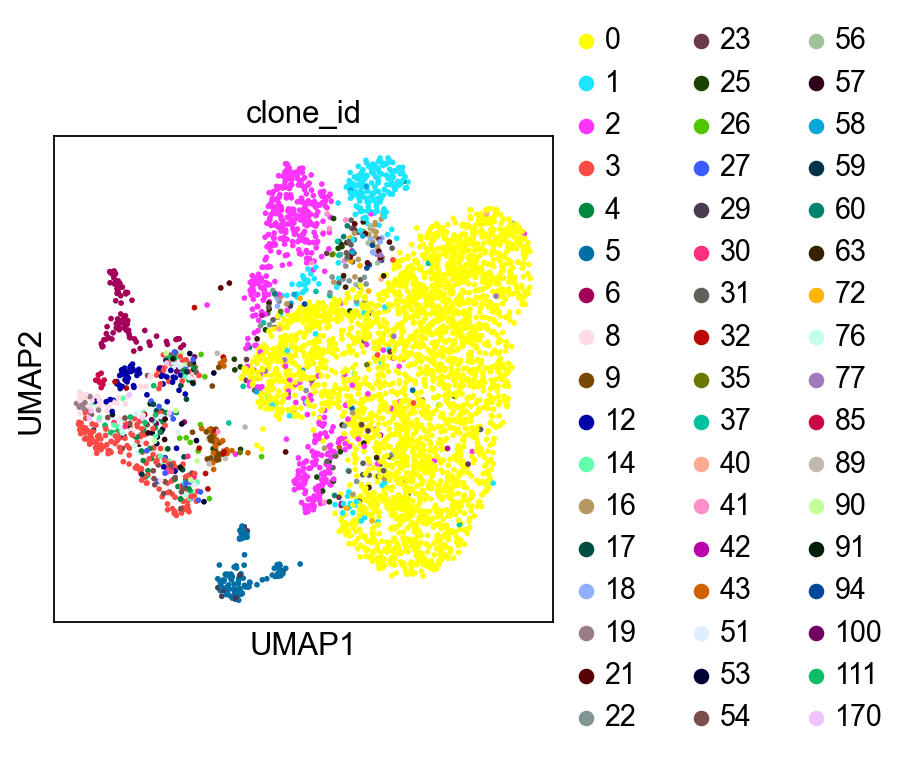

In [18]:
sc.pl.umap(mdata["gex"], color="clone_id")

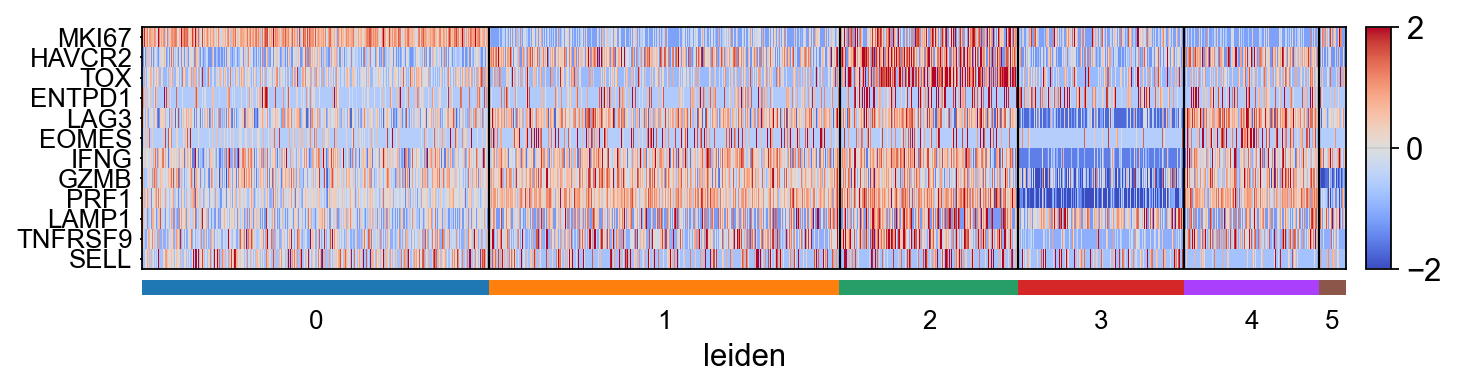

In [25]:
sc.pl.heatmap(mdata["gex"],
              ["MKI67", "HAVCR2", "TOX", "ENTPD1", "LAG3", "EOMES", "IFNG", "GZMB", "PRF1", "LAMP1", "TNFRSF9", "SELL"],
              groupby="leiden",
              use_raw=False,
              vmax=2,
              vmin=-2,
              swap_axes=True,
              cmap= "coolwarm",
              )

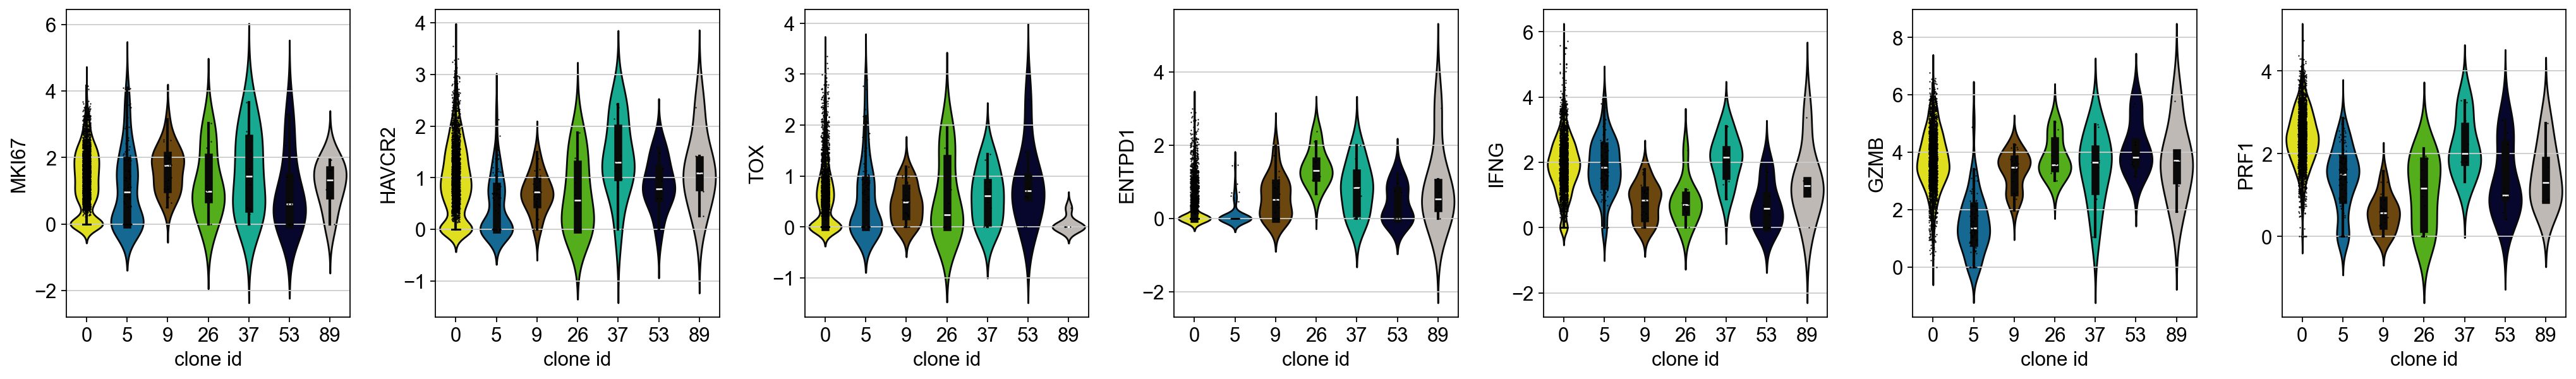

In [22]:
sc.pl.violin(
    mdata["gex"],
    keys=["MKI67", "HAVCR2", "TOX", "ENTPD1", "IFNG", "GZMB", "PRF1"],
    groupby="clone_id",
    order=["0", "5", "9", "26", "37", "53", "89"],
    size=1,
    inner="box",
    cut=3
)

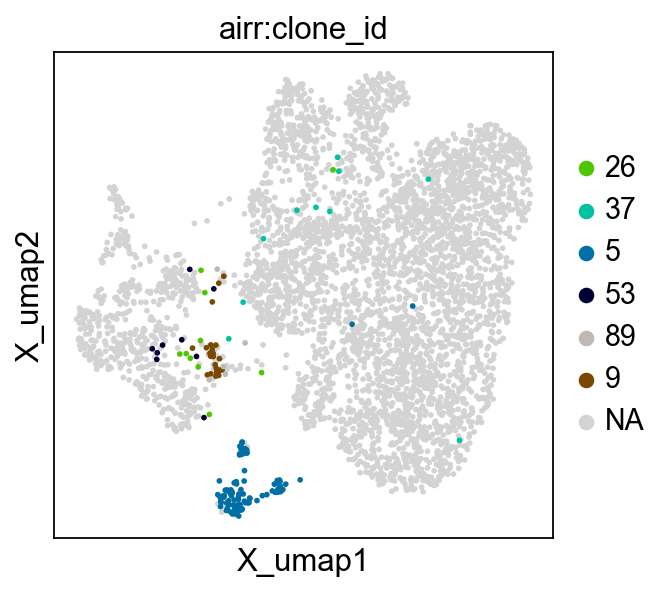

In [24]:
mu.pl.embedding(
    mdata,
    basis="gex:umap",
    color="airr:clone_id",
    groups=["5", "9", "26", "37", "53", "89"]
)

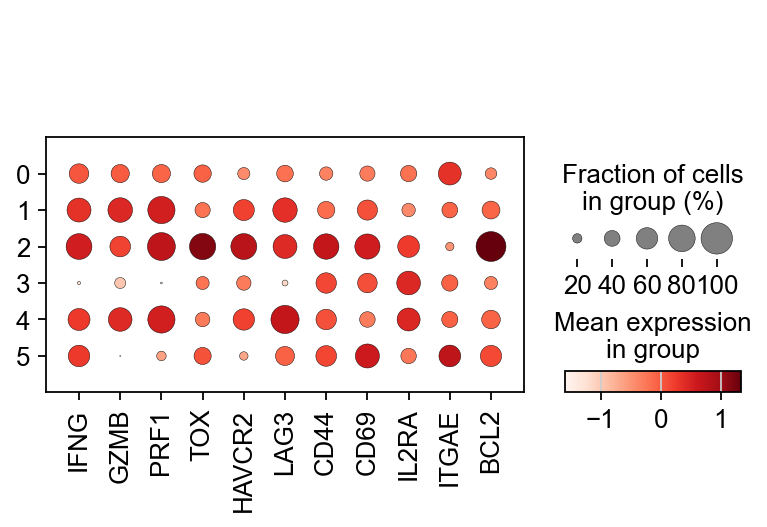

In [37]:
sc.pl.dotplot(
    mdata["gex"],
    var_names=["IFNG", "GZMB", "PRF1", "TOX", "HAVCR2", "LAG3", "CD44", "CD69", "IL2RA", "ITGAE", "BCL2"],
    groupby="leiden",
    use_raw=False
)

Tumor-reactive scoring

In [39]:
scoring_genes = ["IFNG", "GZMB", "PRF1", "TOX", "HAVCR2", "LAG3", "ITGB1", "BCL2", "ITGAE", "GNLY", "PDCD1", "TIGIT", "ENTPD1",]

In [40]:
sc.tl.score_genes(mdata["gex"], scoring_genes, score_name="reactivity_score")

computing score 'reactivity_score'
    finished: added
    'reactivity_score', score of gene set (adata.obs).
    204 total control genes are used. (0:00:00)


In [41]:
genes_present = [g for g in scoring_genes if g in mdata["gex"].var_names]
gex_df = mdata["gex"].to_df()[genes_present]
gex_df["clone_id"] = mdata["gex"].obs["clone_id"]

In [42]:
clone_scores = gex_df.groupby("clone_id").mean()
clone_scores["reactivity_score"] = clone_scores.mean(axis=1)

/var/folders/s3/tmfhtnzx1g34x3_f84h69dh40000gn/T/ipykernel_44761/2608215441.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clone_scores = gex_df.groupby("clone_id").mean()


In [45]:
mdata["gex"].obs["clone_reactivity_score"] = mdata["gex"].obs["clone_id"].map(clone_scores["reactivity_score"])

In [49]:
mdata["gex"].obs.drop("clona_reactivity_score", axis=1, inplace=True)

In [51]:
mdata["gex"].obs["clonal_dynamic_label"] = mdata["airr"].obs["clonal_dynamic_label"]
mdata["gex"].obs["clonal_dynamic"] = mdata["airr"].obs["clonal_dynamic"]
mdata["gex"].obs["expansion_fold"] = mdata["airr"].obs["expansion_fold"]

In [54]:
mdata["gex"].obs["clone_reactivity_score"] = pd.to_numeric(
    mdata["gex"].obs["clone_reactivity_score"], errors="coerce"
)

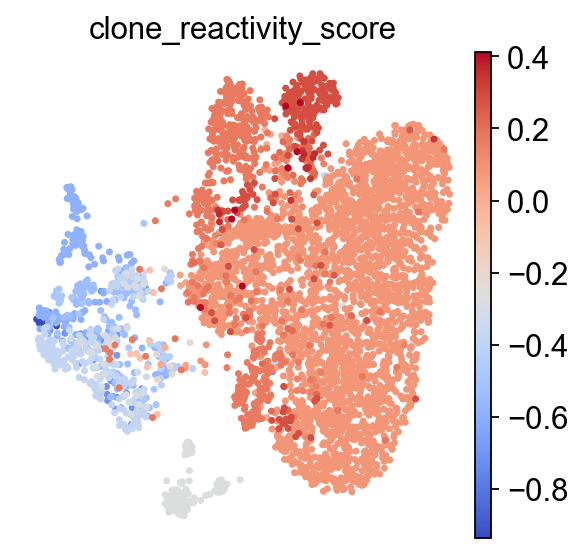

In [56]:
sc.pl.umap(mdata["gex"], color="clone_reactivity_score", cmap="coolwarm", size=40, frameon=False)

Add TCR info to ["airr"].obs & ["gex"].obs

In [58]:
cdr3_info = ir.get.airr(
    mdata["airr"],
    airr_variable=["cdr3_aa"],
    chain=["VJ_1", "VDJ_1"]
)
mdata["airr"].obs["alpha_cdr3_aa"] = cdr3_info["VJ_1_cdr3_aa"]
mdata["airr"].obs["beta_cdr3_aa"] = cdr3_info["VDJ_1_cdr3_aa"]
mdata["gex"].obs["alpha_cdr3_aa"] = cdr3_info["VJ_1_cdr3_aa"]
mdata["gex"].obs["beta_cdr3_aa"] = cdr3_info["VDJ_1_cdr3_aa"]

Extract TCR_CDR3 sequence length

In [59]:
mdata["airr"].obs["alpha_cdr3_len"] = mdata["airr"].obs["alpha_cdr3_aa"].apply(lambda x: len(x) if isinstance(x, str) else 0)
mdata["airr"].obs["beta_cdr3_len"] = mdata["airr"].obs["beta_cdr3_aa"].apply(lambda x: len(x) if isinstance(x, str) else 0)
mdata["gex"].obs["alpha_cdr3_len"] = mdata["airr"].obs["alpha_cdr3_aa"].apply(lambda x: len(x) if isinstance(x, str) else 0)
mdata["gex"].obs["beta_cdr3_len"] = mdata["airr"].obs["beta_cdr3_aa"].apply(lambda x: len(x) if isinstance(x, str) else 0)

In [61]:
mdata["gex"].obs["clonal_abundance"] = mdata["airr"].obs["clone_id_size"]

In [62]:
mdata["gex"].obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,clone_id,reactivity_score,clone_reactivity_score,clonal_dynamic_label,clonal_dynamic,expansion_fold,alpha_cdr3_aa,beta_cdr3_aa,alpha_cdr3_len,beta_cdr3_len,clonal_abundance
AAACCTGAGAATGTTG-1,7719,7714,59153.0,276.0,0.466587,0,0,-0.057149,0.090527,1.0,Enriched,18.141,AMPVVDLLTGGADGLT,ASSVEPQLAGRGDTQY,16,16,2879
AAACCTGAGGTAGCTG-1,3443,3443,9105.0,33.0,0.362438,1,0,1.134350,0.090527,1.0,Enriched,18.141,AMPVVDLLTGGADGLT,ASSVEPQLAGRGDTQY,16,16,2879
AAACCTGAGTAGATGT-1,3740,3740,11302.0,92.0,0.814015,4,1,1.109506,0.286648,1.0,Enriched,4.414,APLGNEKLT,ASSYYRPTGPYEQY,9,14,219
AAACCTGAGTGGAGTC-1,3287,3286,9576.0,55.0,0.574353,1,0,1.022035,0.090527,1.0,Enriched,18.141,AMPVVDLLTGGADGLT,ASSVEPQLAGRGDTQY,16,16,2879
AAACCTGCAGACAAGC-1,3016,3016,8776.0,100.0,1.139471,1,0,1.341511,0.090527,1.0,Enriched,18.141,AMPVVDLLTGGADGLT,ASSVEPQLAGRGDTQY,16,16,2879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATCGACGC-1,1980,1980,4300.0,75.0,1.744186,1,0,1.401209,0.090527,1.0,Enriched,18.141,AMPVVDLLTGGADGLT,ASSVEPQLAGRGDTQY,16,16,2879
TTTGTCAGTTGGAGGT-1,5410,5409,26259.0,232.0,0.883507,0,0,0.553602,0.090527,1.0,Enriched,18.141,AMPVVDLLTGGADGLT,ASSVEPQLAGRGDTQY,16,16,2879
TTTGTCATCACAACGT-1,6239,6238,30520.0,238.0,0.779817,3,111,0.664278,-0.611930,1.0,Enriched,104.145,ATVPMFSGGYNKLI,ASTLLRGEQF,14,10,12
TTTGTCATCCAAATGC-1,2543,2542,4771.0,110.0,2.305596,3,3,0.973242,-0.380814,1.0,Enriched,164.062,ATQLYNARLM,ASSARGTKNIQY,10,12,172


In [63]:
mdata.write("/Users/jerryaaaaaa/tcr_model.h5mu")